# Web Ad Optimization Using Upper Confidence Bound (Reinforcement Learning)

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [4]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\Advertise.csv")

In [5]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(10000, 10)

# Upper Confidence Bound

In [7]:
import math

In [14]:
observation=10000
no_of_ads=10
ads_selected=[]
no_of_selection_of_each_ad=[0]*no_of_ads
sum_of_rewards_of_each_ad=[0]*no_of_ads
total_reward=0
for n in range(0,observation):
    ad=0
    max_upper_bound=0
    for i in range(0,no_of_ads):
        if(no_of_selection_of_each_ad[i]>0):
            average_reward=sum_of_rewards_of_each_ad[i]/no_of_selection_of_each_ad[i]
            delta=math.sqrt(3/2*math.log(n+1)/no_of_selection_of_each_ad[i])
            upper_bound=average_reward+delta
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    no_of_selection_of_each_ad[ad]=no_of_selection_of_each_ad[ad]+1
    reward=df.values[n,ad]
    sum_of_rewards_of_each_ad[ad]=sum_of_rewards_of_each_ad[ad]+reward
    total_reward=total_reward+reward
print("Rewards by Ads = ",sum_of_rewards_of_each_ad)
print("Total Rewards by UCB = ",total_reward)
print("Ads selected at each round:",ads_selected)

Rewards by Ads =  [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
Total Rewards by UCB =  2178
Ads selected at each round: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 

# Visualize the result

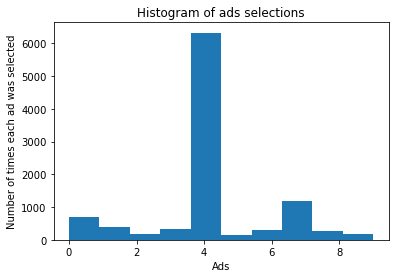

In [15]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()